In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv("BTC-USD.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-10-01,387.427002,391.378998,380.779999,383.614990,383.614990,26229400
1,2014-10-02,383.988007,385.497009,372.946014,375.071991,375.071991,21777700
2,2014-10-03,375.181000,377.695007,357.859009,359.511993,359.511993,30901200
3,2014-10-04,359.891998,364.487000,325.885986,328.865997,328.865997,47236500
4,2014-10-05,328.915985,341.800995,289.295990,320.510010,320.510010,83308096


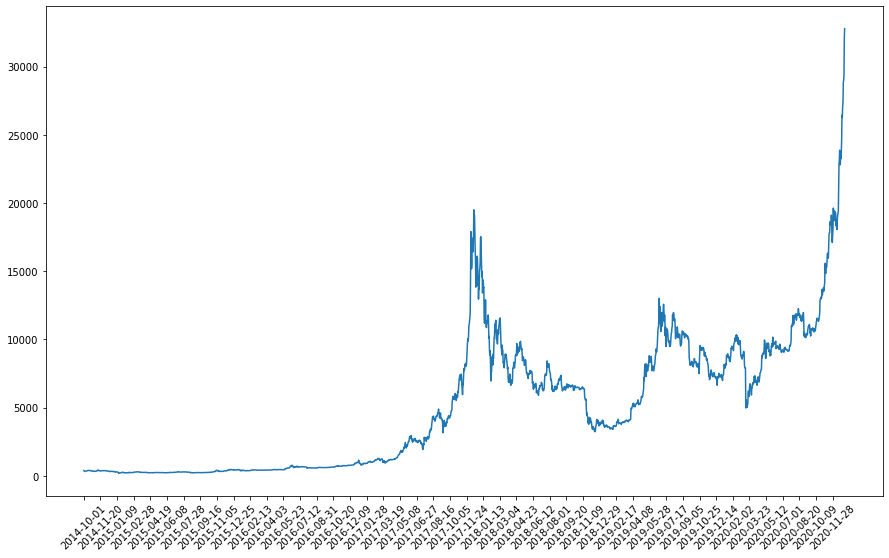

In [3]:
preco=df[["Close"]]
plt.figure(figsize=(15,9))
plt.plot(preco)
plt.xticks(range(0,df.shape[0],50),df["Date"].loc[::50],rotation=45)
plt.show()

In [4]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler= MinMaxScaler()
norm_data= min_max_scaler.fit_transform(preco.values)
norm_data

array([[0.00630329],
       [0.00604127],
       [0.00556402],
       ...,
       [0.89547665],
       [0.97991788],
       [1.        ]])

In [5]:
def univariate_data(dataset,start_index,end_index,history_size,target_size):
    data=[]
    labels=[]

    start_index=start_index+history_size
    if end_index is None:
        end_index=len(dataset)-target_size

    for i in range(start_index,end_index):
        indices=range(i-history_size,i)
        data.append(np.reshape(dataset[indices], (history_size,1)))
        labels.append(dataset[i+target_size])
    return np.array(data),np.array(labels)      


past_history=5
future_target=0

TRAIN_SPLIT=int(len(norm_data)*0.7)

x_train,y_train = univariate_data(norm_data,0,TRAIN_SPLIT,past_history,future_target)

x_test,y_test=univariate_data(norm_data,TRAIN_SPLIT,None,past_history,future_target)

In [6]:
import keras

from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, LSTM, LeakyReLU, Dropout


num_units =51

learning_rate = 0.0003
activatio_fuction = 'sigmoid'
adam = Adam(lr=learning_rate)

loss_fuction = 'mse'

batch_size = 5
num_epochs = 140


model = Sequential()

model.add(LSTM(units=num_units, activation=activatio_fuction, input_shape=(None,1)))
model.add(LeakyReLU(alpha=0.5))
model.add(Dropout(0.1))
model.add(Dense(units=1))

model.compile(optimizer=adam, loss=loss_fuction)



c:\Users\Quebec\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 51)                10812     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 51)                0         
                                                                 
 dropout (Dropout)           (None, 51)                0         
                                                                 
 dense (Dense)               (None, 1)                 52        
                                                                 
Total params: 10,864
Trainable params: 10,864
Non-trainable params: 0
_________________________________________________________________


In [8]:
history=model.fit(x_train,y_train,validation_split=0.01,batch_size=batch_size,epochs=num_epochs,shuffle=False)

Epoch 1/140
316/316 [==============================] - 2s 2ms/step - loss: 0.0228 - val_loss: 6.3923e-05
Epoch 2/140
316/316 [==============================] - 1s 2ms/step - loss: 0.0186 - val_loss: 9.9148e-04
Epoch 3/140
316/316 [==============================] - 1s 2ms/step - loss: 0.0145 - val_loss: 5.4813e-05
Epoch 4/140
316/316 [==============================] - 1s 2ms/step - loss: 0.0133 - val_loss: 7.1829e-04
Epoch 5/140
316/316 [==============================] - 1s 2ms/step - loss: 0.0117 - val_loss: 4.9094e-04
Epoch 6/140
316/316 [==============================] - 1s 2ms/step - loss: 0.0095 - val_loss: 2.8002e-04
Epoch 7/140
316/316 [==============================] - 1s 2ms/step - loss: 0.0086 - val_loss: 0.0016
Epoch 8/140
316/316 [==============================] - 1s 2ms/step - loss: 0.0078 - val_loss: 3.6741e-04
Epoch 9/140
316/316 [==============================] - 1s 2ms/step - loss: 0.0071 - val_loss: 7.9131e-04
Epoch 10/140
316/316 [==============================] - 1s 

22/22 [==============================] - 0s 1ms/step


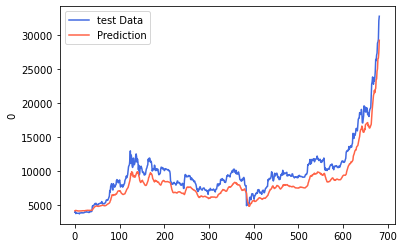

In [9]:
original = pd.DataFrame(min_max_scaler.inverse_transform(y_test))
prediction = pd.DataFrame(min_max_scaler.inverse_transform(model.predict(x_test)))
ax=sns.lineplot(x=original.index,y=original[0],label='test Data', color='royalblue')
ax=sns.lineplot(x=prediction.index,y=prediction[0],label='Prediction', color='tomato')